In [15]:
import roifinder.src.roif_to_bnp
from roifinder.src.roif_to_bnp import ROI_Finder

import roifinder.src.xrfm_batches
from roifinder.src.xrfm_batches import *

import roifinder.misc.utils
from roifinder.misc.utils import lasso_scan_info

# call ROI-finder

In [16]:
BASE_PATCH_WIDTH=32
pixel_threshold=8
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '../xrfdata/'



coarse_scan_names = ['scan1.mda.h5',
                    'scan2.mda.h5',
                    'scan3.mda.h5',
                    'scan4.mda.h5',
                    'scan5.mda.h5']



hdf5_string_list=['MAPS','MAPS','MAPS','MAPS','MAPS']
norm_ch_list=['US_IC','US_IC','US_IC','US_IC','US_IC']
selected_elm_maps_list=[selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps]
noise_type_list = [noise_type,noise_type,noise_type,noise_type,noise_type]
bin_conv_elm_list=['KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa']
apply_gaussian_list=[False, False, False, False,False]
value_offset_list = [1e-12,1e-12,1e-12,1e-12,1e-12]

secondaryDf = ROI_Finder(
                base_file_path,
                coarse_scan_names,
                hdf5_string_list,
                norm_ch_list,
                selected_elm_maps_list,
                noise_type_list,
                bin_conv_elm_list,
                value_offset_list,
                apply_gaussian_list,
                BASE_PATCH_WIDTH=BASE_PATCH_WIDTH,
                normalize = False,
                print_pv=False,  
                verbosity=False ,
                mode='develop' 
                )

XRF ../xrfdata/scan1.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF ../xrfdata/scan2.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF ../xrfdata/scan3.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF ../xrfdata/scan4.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF ../xrfdata/scan5.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)
Bounding box width and height (pixels): 32
Total extracted cells, features: (124, 14)
Total extracted cell, cell size: (124, 32, 32)
Cells, features (106, 7)
k-means assigned class to max K cell: 1
High K cell should be 1. Is it? True
High K cell is class  1
class_0 cells found: 7
class_1 cells found: 1
in scan:  ../xrfdata/scan5.mda.h5
class 0 cell original idx: [[114]
 [115]
 [116]
 [117]
 [118]
 [122]
 [123]]
class 1 cell original idx: [[

In [17]:
coarse_scans = XRFM_batch(base_file_path,
                  coarse_scan_names,
                 hdf5_string_list,
                 norm_ch_list,
                 selected_elm_maps_list,
                 noise_type_list,
                 bin_conv_elm_list,
                 value_offset_list,
                apply_gaussian_list,
                 BASE_PATCH_WIDTH,
                 print_pv=False,  
                 verbosity=False)

XRF ../xrfdata/scan1.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF ../xrfdata/scan2.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF ../xrfdata/scan3.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF ../xrfdata/scan4.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF ../xrfdata/scan5.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)


<IPython.core.display.Javascript object>


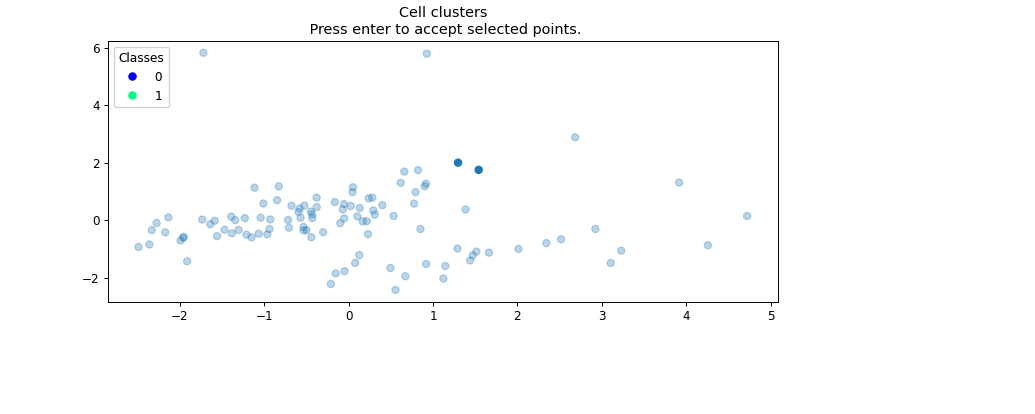

In [18]:
%matplotlib notebook

tag_type = secondaryDf.Class # type A or type B
# tag_type = secondaryDf.confidence # confidence metric only


subplot_kw = dict(autoscale_on=True)
fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=(10,4))


pts = ax.scatter(secondaryDf['PC1'].to_numpy(),secondaryDf['PC2'].to_numpy(), c=tag_type,
                 cmap='winter')

legend = ax.legend(*pts.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend)

selector = SelectFromCollection(ax, pts)

fig.canvas.mpl_connect("key_press_event", accept)
ax.set_title("Cell clusters\n Press enter to accept selected points.")

plt.show()



In [19]:
lasso_scan_info(selector, secondaryDf, coarse_scans, BASE_PATCH_WIDTH)

number of selected cells: 2
modified_indices: [49 68]
original indices: [56 78]
K-means classes 

cell centers (pixel value in XRF image): [[161.86764706 195.76470588]
 [ 17.42045455  76.13636364]]


cell centers in x (pixel value in XRF image): [161.86764706 195.76470588]


cell x_origins (motor coordinates): [110.51075 110.57246]


cell y_origins (motor coordinates): [-741.07153 -581.0459 ]


send to motor
cell x_center (motor coordinates): [159.26074982 129.57245636]


cell y_center (motor coordinates): [-700.8215332  -576.79589844]


BBox motor width (x):  [8. 8.]
BBox motor width (y):  [8.205078  7.4316406]
Main XRF image file (selected): ['../xrfdata/scan2.mda.h5' '../xrfdata/scan3.mda.h5']
[[ 159.26074982 -700.8215332 ]
 [ 129.57245636 -576.79589844]]


In [20]:
%matplotlib inline
coarse_scans.ROI_viewer(selected_elm_channel = 'P', linethresh_val=0.00001)

interactive(children=(IntSlider(value=61, description='idx', max=123), Output()), _dom_classes=('widget-intera…

# getting recommendation

In [21]:
BASE_PATCH_WIDTH=32
pixel_threshold=8
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '../xrfdata/'



coarse_scan_names = ['scan1.mda.h5',
                    'scan2.mda.h5',
                    'scan3.mda.h5',
                    'scan4.mda.h5',
                    'scan5.mda.h5']



hdf5_string_list=['MAPS','MAPS','MAPS','MAPS','MAPS']
norm_ch_list=['US_IC','US_IC','US_IC','US_IC','US_IC']
selected_elm_maps_list=[selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps]
noise_type_list = [noise_type,noise_type,noise_type,noise_type,noise_type]
bin_conv_elm_list=['KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa']
apply_gaussian_list=[False, False, False, False,False]
value_offset_list = [1e-12,1e-12,1e-12,1e-12,1e-12]

coords = ROI_Finder(
                base_file_path,
                coarse_scan_names,
                hdf5_string_list,
                norm_ch_list,
                selected_elm_maps_list,
                noise_type_list,
                bin_conv_elm_list,
                value_offset_list,
                apply_gaussian_list,
                BASE_PATCH_WIDTH=BASE_PATCH_WIDTH,
                normalize = False,
                print_pv=False,  
                verbosity=False ,
                mode='auto' 
                )

XRF ../xrfdata/scan1.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF ../xrfdata/scan2.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF ../xrfdata/scan3.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF ../xrfdata/scan4.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF ../xrfdata/scan5.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)
Bounding box width and height (pixels): 32
Total extracted cells, features: (124, 14)
Total extracted cell, cell size: (124, 32, 32)
Cells, features (106, 7)
k-means assigned class to max K cell: 1
High K cell should be 1. Is it? True
High K cell is class  1
class_0 cells found: 7
class_1 cells found: 1
in scan:  ../xrfdata/scan5.mda.h5


In [22]:
coords

(array([[-5.29697495e+01, -1.04197632e+03,  9.91366070e-01],
        [-2.12197495e+01, -1.04672632e+03,  9.80434955e-01],
        [-1.09697495e+01, -1.04372632e+03,  9.74563987e-01],
        [-1.42197495e+01, -1.04672632e+03,  9.30066526e-01],
        [-5.89697495e+01, -1.03422632e+03,  9.28315527e-01],
        [-5.14697495e+01, -1.05147632e+03,  8.73939223e-01],
        [-5.27197495e+01, -1.03222632e+03,  6.07373835e-01]]),
 array([[-2.27197495e+01, -1.05422632e+03,  7.70909363e-01]]))